In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
trainorg=pd.read_csv("train.csv")
testorg=pd.read_csv("test.csv")
train = trainorg.copy()
test = testorg.copy()

In [3]:
train.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,2.5,2590.0,sqft,6000.00,sqft,98144,795000.0
1,4,2.0,2240.0,sqft,0.31,acre,98106,915000.0
2,4,3.0,2040.0,sqft,3783.00,sqft,98107,950000.0
3,4,3.0,3800.0,sqft,5175.00,sqft,98199,1950000.0
4,2,2.0,1042.0,sqft,NaN,NaN,98102,950000.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   beds            2016 non-null   int64  
 1   baths           2016 non-null   float64
 2   size            2016 non-null   float64
 3   size_units      2016 non-null   object 
 4   lot_size        1669 non-null   float64
 5   lot_size_units  1669 non-null   object 
 6   zip_code        2016 non-null   int64  
 7   price           2016 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 126.1+ KB


In [5]:
train.shape

(2016, 8)

In [6]:
train.isnull().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [7]:
for column in train.columns:
    print(train[column].value_counts())
    print("*"*20)

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64
********************
baths
2.0    627
1.0    493
2.5    282
3.0    198
3.5    179
1.5    137
4.0     37
4.5     21
5.0     16
5.5     13
6.0      5
7.0      4
8.5      1
0.5      1
9.0      1
6.5      1
Name: count, dtype: int64
********************
size
2080.0    12
1440.0    11
1460.0    11
1370.0    11
1670.0    11
          ..
1548.0     1
1174.0     1
1865.0     1
578.0      1
795.0      1
Name: count, Length: 879, dtype: int64
********************
size_units
sqft    2016
Name: count, dtype: int64
********************
lot_size
5000.0    61
4000.0    45
6000.0    38
1.0       26
4800.0    16
          ..
745.0      1
5043.0     1
2256.0     1
8540.0     1
4267.0     1
Name: count, Length: 959, dtype: int64
********************
lot_size_units
sqft    1449
acre     220
Name: count, dtype: int64
********************
zip_code
98115    170
98103   

In [8]:
train.isna().sum()

beds                0
baths               0
size                0
size_units          0
lot_size          347
lot_size_units    347
zip_code            0
price               0
dtype: int64

In [9]:
train.drop(columns=["lot_size","lot_size_units","size_units"],axis=1,inplace=True)

In [10]:
train.describe()


,beds,baths,size,zip_code,price
count,2016.000000,2016.000000,2016.000000,2016.000000,2.016000e+03
mean,2.857639,2.159970,1735.740575,98123.638889,9.636252e+05
std,1.255092,1.002023,920.132591,22.650819,9.440954e+05
min,1.000000,0.500000,250.000000,98101.000000,1.590000e+05
25%,2.000000,1.500000,1068.750000,98108.000000,6.017500e+05
50%,3.000000,2.000000,1560.000000,98117.000000,8.000000e+05
75%,4.000000,2.500000,2222.500000,98126.000000,1.105250e+06
max,15.000000,9.000000,11010.000000,98199.000000,2.500000e+07


In [11]:
train.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   beds      2016 non-null   int64  
 1   baths     2016 non-null   float64
 2   size      2016 non-null   float64
 3   zip_code  2016 non-null   int64  
 4   price     2016 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 78.9 KB


In [12]:
train['beds'].value_counts()

beds
3     645
2     560
4     398
1     256
5     123
6      22
9       5
7       3
8       2
15      1
14      1
Name: count, dtype: int64

we do not have columns with missing values anymore so we dont need to replace any null values

In [13]:
train.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


In [14]:
train.corr()

,beds,baths,size,zip_code,price
beds,1.000000,0.652853,0.771929,0.077811,0.293516
baths,0.652853,1.000000,0.667655,-0.002679,0.317325
size,0.771929,0.667655,1.000000,0.070557,0.444140
zip_code,0.077811,-0.002679,0.070557,1.000000,-0.047189
price,0.293516,0.317325,0.444140,-0.047189,1.000000


In [15]:
correlation = train.corr()
fig = px.imshow(correlation,text_auto=True)
fig.show()


In [16]:
fig = px.scatter(train, x="price", y="zip_code", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),trendline_color_override="black",
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [17]:
fig = px.scatter(train, x="price", y="beds", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [18]:
fig = px.scatter(train, x="price", y="size", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [19]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)

clf.fit_predict(train)

train_scores = clf.negative_outlier_factor_

np.sort(train_scores) [0:20] 

array([-33.44584842, -33.44584815,  -7.04837631,  -7.02888285,
        -6.60265357,  -5.55863404,  -5.45040527,  -5.27643339,
        -5.27614909,  -5.27246878,  -5.12624121,  -5.09561113,
        -5.04031467,  -4.8908919 ,  -4.55946606,  -4.43179947,
        -4.33456053,  -4.28405232,  -4.20221561,  -4.16728819])

In [20]:
threshold_value = np.sort(train_scores)[13]
threshold_value

-4.890891897864154

In [21]:
contrary_train = train_scores < threshold_value
np.count_nonzero(contrary_train)

13

In [22]:
new_train = train[train_scores > threshold_value].reset_index(drop=True)
new_train

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0
...,...,...,...,...,...
1997,3,2.0,1370.0,98112,910000.0
1998,1,1.0,889.0,98121,550000.0
1999,4,2.0,2140.0,98199,1150000.0
2000,2,2.0,795.0,98103,590000.0


In [23]:
train[train_scores < threshold_value] 

,beds,baths,size,zip_code,price
153,3,3.0,1530.0,98126,745000.0
337,3,2.0,2180.0,98117,1012000.0
396,5,2.5,2180.0,98118,1009975.0
513,1,1.0,830.0,98103,695000.0
608,2,2.0,1288.0,98133,755000.0
677,4,2.5,1806.0,98118,745000.0
786,2,1.5,1115.0,98107,745000.0
1089,2,2.5,950.0,98107,695000.0
1359,2,1.0,730.0,98105,25000000.0
1366,1,1.0,1100.0,98107,745000.0


In [24]:
fig = px.scatter(new_train, x="price", y="size", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [25]:
fig = px.scatter(new_train, x="price", y="zip_code", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [26]:
fig = px.scatter(new_train, x="price", y="beds", log_x=True, 
                 trendline="ols", trendline_options=dict(log_x=True),
                 title="Log-scaled X axis and log-transformed fit")
fig.show()

In [27]:
fig = px.scatter_matrix(new_train,height = 1000)
fig.show()

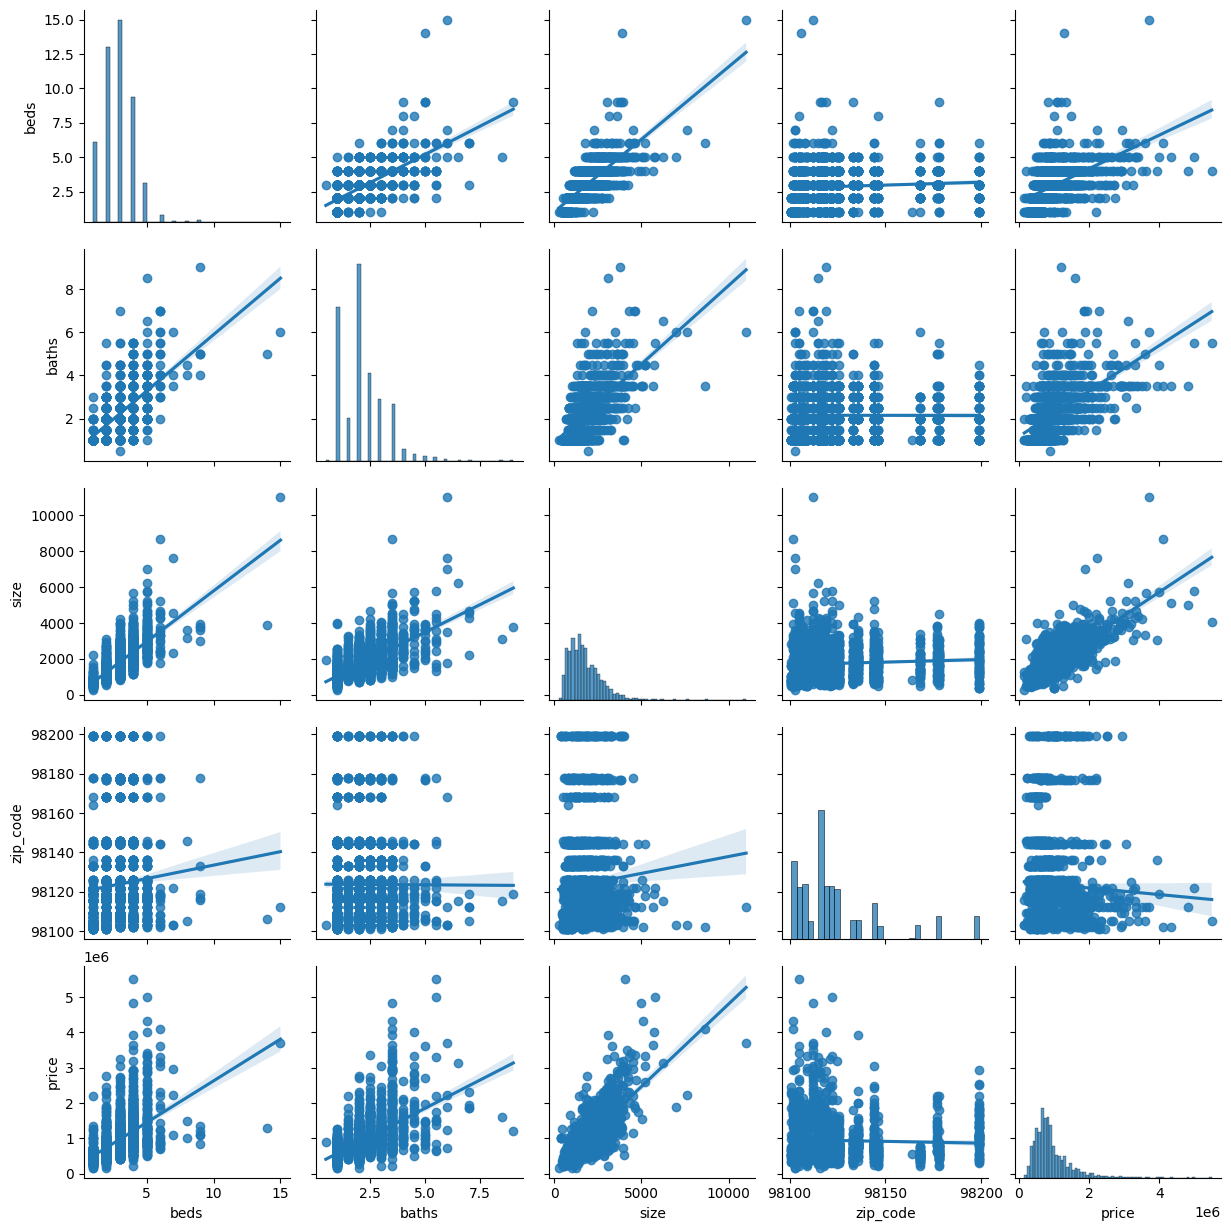

In [28]:
sns.pairplot(new_train,kind="reg")

# saving final dataset

In [29]:
train.to_csv("final_dataset.csv")

In [30]:
X_train=new_train.loc[:,["beds","baths","size"]]
y_train=new_train.loc[:,"price"]

In [31]:
X_train.shape,y_train.shape,test.shape

((2002, 3), (2002,), (505, 8))

In [32]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
test.head()

,beds,baths,size,size_units,lot_size,lot_size_units,zip_code,price
0,3,3.0,2850.0,sqft,4200.00,sqft,98119,1175000.0
1,4,5.0,3040.0,sqft,5002.00,sqft,98106,1057500.0
2,3,1.0,1290.0,sqft,6048.00,sqft,98125,799000.0
3,3,2.0,2360.0,sqft,0.28,acre,98188,565000.0
4,3,3.5,1942.0,sqft,1603.00,sqft,98107,1187000.0


In [34]:
X_test=test.loc[:,["beds","baths","size"]]
y_test=test.loc[:,"price"]

In [35]:
X_test.shape,y_test.shape

((505, 3), (505,))

In [36]:
import statsmodels.api as sm

In [37]:
lm = sm.OLS(y_train, X_train)

In [38]:
model = lm.fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
beds,-6.938e+04,9262.708,-7.490,0.000,-8.75e+04,-5.12e+04
baths,1.153e+05,1.01e+04,11.417,0.000,9.55e+04,1.35e+05
size,498.8871,13.787,36.185,0.000,471.848,525.926


# Scikit-learn model

# Linear Regression

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [40]:
model.intercept_

145032.39472067473

In [41]:
model.coef_

array([-96182.13857824,  89958.53310349,    502.96705412])

In [42]:
print("Train Error: " + str(np.sqrt(mean_squared_error(y_train, model.predict(X_train)))))
print("Model score: "+str(model.score(X_train, y_train)))

Train Error: 335315.9932437552
Model score: 0.6314532977358311


In [43]:
lineer_regression_score=model.score(X_train, y_train)
lineer_regression_score

0.6314532977358311

In [44]:
new_train.head()

,beds,baths,size,zip_code,price
0,3,2.5,2590.0,98144,795000.0
1,4,2.0,2240.0,98106,915000.0
2,4,3.0,2040.0,98107,950000.0
3,4,3.0,3800.0,98199,1950000.0
4,2,2.0,1042.0,98102,950000.0


# lasso regression

In [45]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
lasso_model.intercept_

145032.3825347385

In [46]:

print(lasso_model.coef_)


[-96181.91027443  89958.28502013    502.96699368]


Text(0.5, 1.0, 'weights')

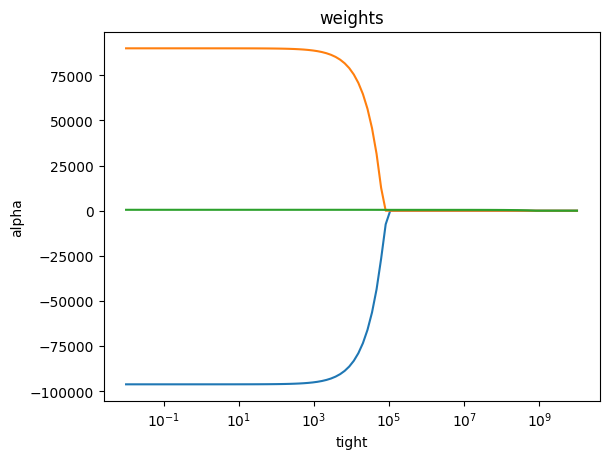

In [47]:
from matplotlib import pyplot as plt
lasso=Lasso()
lambdas = 10 ** np.linspace(10,-2,100) * 0.5
coefs = []

for i in lambdas:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(lambdas*2, coefs)
ax.set_xscale('log')

plt.xlabel('tight')
plt.ylabel('alpha')
plt.title('weights')

In [48]:
lasso_model.predict(X_test)

array([1559817.43876915, 1739115.8273348 ,  595272.358583  ,
       1223405.32684422, 1148102.55101481,  616942.34694313,
        519051.80450499, 1959845.53071258,  976333.31846481,
        476802.57703559,  966604.27314433,  648529.40195384,
       1293820.70595987, 1037925.72065602,  427511.81165464,
       1259734.16487034, 1158307.50458682,  844283.42808796,
        871616.31818736, 1303304.27199068,  790235.53080201,
       1248265.78960695,  927848.75588856,  483341.14795348,
        608391.90805051,  846180.08158177,  645569.05795132,
        857433.3767729 ,  996164.11129072,  535246.61389418,
        617445.31393681,  535534.50081561, 1784958.63060915,
        465119.12169996, 1077157.14616331,  997070.17968675,
        495297.14132095, 1147960.27779173, 1171814.8065671 ,
       1424592.12431752, 1565753.17710202,  826894.6633813 ,
       1912723.95685727, 1131677.31266377, 2100606.82256999,
       1700317.90244728, 1086367.87560052,  966892.16006575,
       1252389.39114775,

In [49]:
y_pred = lasso_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

413357.1108006219

In [50]:
from sklearn.linear_model import LassoCV



In [51]:
lasso_cv_model = LassoCV(alphas = None,
                         cv=10,
                         max_iter=10000,
                        )

In [52]:
lasso_cv_model.fit(X_train,y_train)
optimized_alpha=lasso_cv_model.alpha_
lasso_tuned = Lasso(alpha = optimized_alpha)
lasso_tuned.fit(X_train, y_train)

Lasso(alpha=396816.92159516463)

In [53]:
y_pred = lasso_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))
lasso_reg_score=lasso_tuned.score(X_train, y_train)
lasso_reg_score

0.6074132173630277

# ElasticNet regression

In [54]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
print(enet_model.coef_)
enet_model.intercept_
y_pred = enet_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

[-45966.98226814  38946.90691758    487.12083228]


417590.1103464549

In [55]:
ElasticNetRegressionScore=enet_model.score(X_train,y_train)
ElasticNetRegressionScore

0.6244140434384372

In [56]:
scores=[["LinearRegression",lineer_regression_score],["LassoRegression",lasso_reg_score],["ElasticNetRegression",ElasticNetRegressionScore]]
scoredf=pd.DataFrame(scores, columns=["Models","Scores"])
scoredf

,Models,Scores
0,LinearRegression,0.631453
1,LassoRegression,0.607413
2,ElasticNetRegression,0.624414
